# ¿Qué es mejor para ganar? (Versión LoL)

Para este proyecto, serán analizadas una serie de partidas de League of Legends y sus respectivos datos, para averiguar cuál es la mejor opción para ganar, ya sea campeones, lado del mapa, objetivos, o incluso colocación de wards.

#### Hipótesis principal

¿Hay algún factor que determine que la partida ya está acabada, ya sea para ganar o para perder?
Explicación: es lógico pensar que todos los factores en una partida ayudan a ganar la partida. Lo que quiero saber es cuántas condiciones deben cumplirse para que la partida sea una victoria segura, o más bien si existe esa serie de condiciones que al cumplirse determine que ya se ha ganado aún sin haber acabado la partida.

#### Hipótesis secundarias

- ¿Existe una relación entre los asesinatos y ganar la partida?
- ¿Es determinante el primer dragón para ganar la partida?
- ¿... la primera torre ...?
- ¿... la cantidad de minions ...?
- ¿Hay algún campeón que esté desbalanceado?¿Y objeto?
- ¿Es alguna línea muy "superior" al resto?
- ¿Se puede ganar sin tirar ningúna torre?
- Por último, la visión en el lol es un factor muy determinante pero, ¿puede llegar a decidir una partida?

In [1]:
import pandas as pd
# fuente: https://www.kaggle.com/datasets/paololol/league-of-legends-ranked-matches
campeones = pd.read_csv("champs.csv", sep = ",")
partidas = pd.read_csv("matches.csv", sep = ",")
invocadores = pd.read_csv("participants.csv", sep = ",")
lado_azul = pd.read_csv("stats1.csv", sep = ",")
lado_rojo = pd.read_csv("stats2.csv", sep = ",", low_memory = False)
bans = pd.read_csv("teambans.csv", sep = ",")
stats = pd.read_csv("teamstats.csv", sep = ",")

In [2]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://ddragon.leagueoflegends.com/cdn/13.24.1/data/en_US/item.json"
response = requests.get(url)
items = response.json()

itemid = []
itemname = []
for item_id, data in items["data"].items():
    itemid.append(item_id)
    itemname.append(data["name"])

objetos = pd.DataFrame({"objectid": itemid, "objectname": itemname})

In [4]:
objetos["objectid"] = objetos["objectid"].astype("int64")

In [5]:
objetos.head()

,objectid,objectname
0,1001,Boots
1,1004,Faerie Charm
2,1006,Rejuvenation Bead
3,1011,Giant's Belt
4,1018,Cloak of Agility


In [6]:
url = "https://ddragon.leagueoflegends.com/cdn/14.8.1/data/en_US/summoner.json"
response = requests.get(url)
spells = response.json()

spellsid = []
spellsname = []
for spell_id, spell_data in spells["data"].items():
    spellsid.append(spell_data["key"])
    spellsname.append(spell_data["name"])

hechizos = pd.DataFrame({"spellid": spellsid, "spellname": spellsname})

In [7]:
hechizos["spellid"] = hechizos["spellid"].astype("int64")

In [8]:
hechizos.head()

,spellid,spellname
0,21,Barrier
1,1,Cleanse
2,2202,Flash
3,2201,Flee
4,14,Ignite


In [9]:
campeones.head()

,name,id
0,Jax,24
1,Sona,37
2,Tristana,18
3,Varus,110
4,Fiora,114


In [10]:
partidas.drop(partidas.iloc[100000: len(partidas)].index, inplace = True)

In [11]:
partidas.head()

,id,gameid,platformid,queueid,seasonid,duration,creation,version
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675


In [12]:
partidas.drop(columns = ["version", "creation", "gameid", "seasonid"], inplace= True)

In [13]:
invocadores.head()

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID


In [14]:
invocadores.drop(columns = "role", inplace = True)

In [15]:
lado_azul.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [16]:
lado_azul.drop(columns = ["trinket", "largestmultikill", "killingsprees", "longesttimespentliving", "doublekills", "triplekills", "quadrakills", "legendarykills", "magicdmgdealt", "physicaldmgdealt", "largestcrit", "magicdmgtochamp", "physdmgtochamp", "dmgselfmit", "timecc", "magicdmgtaken", "physdmgtaken", "neutralminionskilled", "ownjunglekills", "enemyjunglekills", "totcctimedealt", "pinksbought", "wardsbought", "wardskilled"], inplace = True)

In [17]:
lado_azul.drop(columns = "firstblood", inplace = True)

In [18]:
lado_rojo.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,1028382,0,1056,3001,1052,3020,1058,1026,3340,7,...,0,0,0,50,12,0,0,6,0,0
1,1028383,0,1041,2003,0,0,0,0,3340,0,...,11,11,0,114,3,0,0,0,0,0
2,1028384,0,1036,2010,0,0,0,0,3340,0,...,0,0,0,0,1,0,0,0,0,0
3,1028385,0,1055,2010,0,0,0,0,3340,0,...,0,0,0,0,2,0,0,0,0,0
4,1028386,0,2033,0,0,0,0,0,3340,0,...,0,0,0,0,3,0,0,0,0,0


In [19]:
lado_rojo.drop(columns = ["trinket", "largestmultikill", "killingsprees", "longesttimespentliving", "doublekills", "triplekills", "quadrakills", "legendarykills", "magicdmgdealt", "physicaldmgdealt", "largestcrit", "magicdmgtochamp", "physdmgtochamp", "dmgselfmit", "timecc", "magicdmgtaken", "physdmgtaken", "neutralminionskilled", "ownjunglekills", "enemyjunglekills", "totcctimedealt", "pinksbought", "wardsbought", "wardskilled"], inplace = True)

In [20]:
lado_rojo.drop(columns = "firstblood", inplace = True)

In [21]:
bans.head()

,matchid,teamid,championid,banturn
0,10,100,11,1
1,10,100,117,3
2,10,100,120,5
3,10,200,84,2
4,10,200,201,4


In [22]:
stats.head()

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,100,0,1,0,0,0,0,5,0,0,0,0
1,10,200,1,0,1,1,1,1,10,3,1,3,1
2,11,100,1,0,0,0,0,0,2,0,0,0,0
3,11,200,0,1,1,0,1,0,10,3,0,2,0
4,12,100,1,0,0,0,0,0,1,0,0,0,0


In [23]:
stats.drop(columns = ["firstharry", "towerkills", "inhibkills", "harrykills"], inplace = True)

### Creación de la tabla equipo donde se concatenan las stats de ambos equipos y se hace merge con la tabla invocadores

In [24]:
equipo = invocadores.merge(pd.concat([lado_azul, lado_rojo]), left_on = "id", right_on = "id", how = "inner")

In [25]:
equipo

,id,matchid,player,championid,ss1,ss2,position,win,item1,item2,...,visionscore,totdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,champlvl,wardsplaced
0,9,10,1,19,4,11,JUNGLE,0,3748,2003,...,14,41446,3218,10497,10275,0,0,42,13,10
1,10,10,2,267,3,4,BOT,0,2301,3111,...,30,17769,2136,9496,7975,1,0,17,14,17
2,11,10,3,119,7,4,BOT,0,1055,3072,...,26,25627,1993,13136,11775,0,0,205,14,13
3,12,10,4,114,12,4,TOP,0,1029,3078,...,5,31705,1918,11006,10683,3,0,164,15,3
4,13,10,5,112,4,3,MID,0,3020,1058,...,15,20585,2615,11439,10485,1,0,235,15,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834512,1865600,187588,6,222,4,7,BOT,0,3035,1053,...,0,30220,372,16413,15215,1,0,292,18,13
1834513,1865601,187588,7,1,14,4,MID,0,3089,3285,...,0,21003,273,13340,12575,0,0,189,18,13
1834514,1865602,187588,8,53,4,3,BOT,0,1329,3190,...,0,31520,451,11972,11285,1,0,59,17,5
1834515,1865603,187588,9,92,4,11,JUNGLE,0,3074,3071,...,0,31790,342,10041,9430,0,0,53,15,8


### Merge de la tabla partidas con equipo

In [26]:
todo = partidas.merge(equipo, left_on = "id", right_on = "matchid", how = "inner")

### Merge de la tabla todo con los campeones

In [27]:
todo = todo.merge(campeones, left_on = "championid", right_on = "id", how = "inner").drop(columns = ["championid", "id"])

### Merge de la tabla todo con los summonners (hechizos)

In [28]:
todo = todo.merge(hechizos, left_on = "ss1", right_on = "spellid", how = "inner")

In [29]:
todo.drop(columns = "ss1", inplace = True)

In [30]:
todo = todo.merge(hechizos, left_on = "ss2", right_on = "spellid", how = "inner").drop(columns = "ss2")

In [31]:
todo.drop(columns = ["spellid_x", "spellid_y"], inplace = True)

In [32]:
todo.rename(columns = {"spellname_x": "summoner1", "spellname_y": "summoner2"}, inplace = True)

In [33]:
todo

,id_x,platformid,queueid,duration,id_y,matchid,player,position,win,item1,...,goldearned,goldspent,turretkills,inhibkills,totminionskilled,champlvl,wardsplaced,name,summoner1,summoner2
0,10,EUW1,420,1909,9,10,1,JUNGLE,0,3748,...,10497,10275,0,0,42,13,10,Warwick,Flash,Smite
1,10,EUW1,420,1909,10,10,2,BOT,0,2301,...,9496,7975,1,0,17,14,17,Nami,Exhaust,Flash
2,10,EUW1,420,1909,11,10,3,BOT,0,1055,...,13136,11775,0,0,205,14,13,Draven,Heal,Flash
3,10,EUW1,420,1909,12,10,4,TOP,0,1029,...,11006,10683,3,0,164,15,3,Fiora,Teleport,Flash
4,10,EUW1,420,1909,13,10,5,MID,0,3020,...,11439,10485,1,0,235,15,10,Viktor,Flash,Exhaust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,103125,EUW1,420,1249,1028378,103125,6,BOT,0,1055,...,6160,5325,0,0,82,10,6,Jinx,Flash,Heal
999993,103125,EUW1,420,1249,1028379,103125,7,TOP,0,3083,...,5445,4800,0,0,73,10,1,Sejuani,Flash,Teleport
999994,103125,EUW1,420,1249,1028380,103125,8,JUNGLE,0,3144,...,6105,5375,0,0,41,10,5,Xin Zhao,Flash,Smite
999995,103125,EUW1,420,1249,1028381,103125,9,BOT,0,2301,...,5859,5625,0,0,17,9,15,Malzahar,Flash,Ignite


### Merge de la tabla todo con los items, y borrado de items 4, 5 y 6

In [34]:
todo = todo.merge(objetos, left_on = "item1", right_on = "objectid", how = "left").drop(columns = ["item1", "objectid"]).rename(columns = {"objectname": "item1"}).fillna("olditem")

In [35]:
todo = todo.merge(objetos, left_on = "item2", right_on = "objectid", how = "left").drop(columns = ["item2", "objectid"]).rename(columns = {"objectname": "item2"}).fillna("olditem")

In [36]:
todo = todo.merge(objetos, left_on = "item3", right_on = "objectid", how = "left").drop(columns = ["item4", "item5", "item6", "item3", "objectid"]).rename(columns = {"objectname": "item3"}).fillna("olditem")

### Creación de la columna teamid en base al número del jugador, si es del 1 al 5, pertenece al equipo azul así que teamid 100, y si es del 6 al 10, pertenece al rojo así que teamid 200

In [37]:
todo["teamid"] = np.where(todo["player"] <= 5, 100, 200)

### Merge de la tabla todo con stats por matchid

In [38]:
todo = todo.merge(stats, left_on = ["matchid", "teamid"], right_on = ["matchid", "teamid"], how = "inner")

### Últimos retoques del dataset final

In [39]:
todo.drop(columns = ["id_x", "id_y", "totdmgdealt", "truedmgdealt", "totheal", "totunitshealed", "dmgtoobj"], inplace = True)

In [40]:
todo

,platformid,queueid,duration,matchid,player,position,win,kills,deaths,assists,...,item2,item3,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,baronkills,dragonkills
0,EUW1,420,1909,10,1,JUNGLE,0,6,10,1,...,Health Potion,Mercury's Treads,100,0,1,0,0,0,0,0
1,EUW1,420,1909,10,2,BOT,0,0,2,12,...,Mercury's Treads,Locket of the Iron Solari,100,0,1,0,0,0,0,0
2,EUW1,420,1909,10,3,BOT,0,7,8,5,...,Bloodthirster,Berserker's Greaves,100,0,1,0,0,0,0,0
3,EUW1,420,1909,10,4,TOP,0,5,11,2,...,Trinity Force,Maw of Malmortius,100,0,1,0,0,0,0,0
4,EUW1,420,1909,10,5,MID,0,2,8,2,...,Needlessly Large Rod,olditem,100,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,EUW1,420,1249,103125,6,BOT,0,3,6,4,...,Berserker's Greaves,Runaan's Hurricane,200,0,0,0,0,0,0,0
999993,EUW1,420,1249,103125,7,TOP,0,0,5,4,...,Boots,Chain Vest,200,0,0,0,0,0,0,0
999994,EUW1,420,1249,103125,8,JUNGLE,0,3,6,1,...,Mercury's Treads,olditem,200,0,0,0,0,0,0,0
999995,EUW1,420,1249,103125,9,BOT,0,2,7,5,...,Rylai's Crystal Scepter,Boots,200,0,0,0,0,0,0,0


In [41]:
todo.columns

Index(['platformid', 'queueid', 'duration', 'matchid', 'player', 'position',
       'win', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'pentakills', 'totdmgtochamp', 'truedmgtochamp', 'dmgtoturrets',
       'visionscore', 'totdmgtaken', 'truedmgtaken', 'goldearned', 'goldspent',
       'turretkills', 'inhibkills', 'totminionskilled', 'champlvl',
       'wardsplaced', 'name', 'summoner1', 'summoner2', 'item1', 'item2',
       'item3', 'teamid', 'firstblood', 'firsttower', 'firstinhib',
       'firstbaron', 'firstdragon', 'baronkills', 'dragonkills'],
      dtype='object')

# Gráficas

In [42]:
todo.groupby("win")["totminionskilled"].apply(list)

win
0    [42, 17, 205, 164, 235, 36, 128, 114, 189, 120...
1    [28, 187, 183, 191, 72, 185, 186, 199, 35, 43,...
Name: totminionskilled, dtype: object

Text(0.5, 0, 'Máximo de minions de los que ganan: 640')

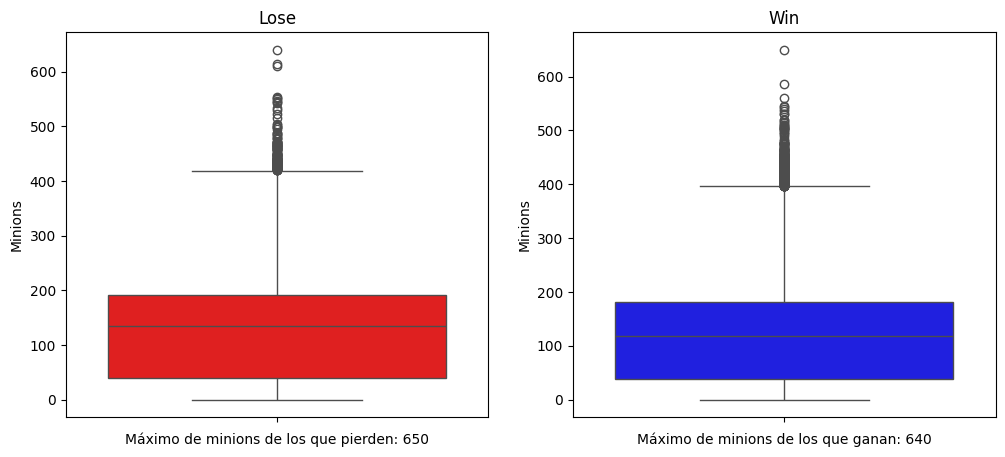

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data = todo.groupby("win")["totminionskilled"].apply(list)[1], ax = ax1, color = "red")
ax1.set_title("Lose")
ax1.set_ylabel("Minions")
ax1.set_xlabel(f"Máximo de minions de los que pierden: {max(todo.groupby("win")["totminionskilled"].apply(list)[0])}")
sns.boxplot(data = todo.groupby("win")["totminionskilled"].apply(list)[0], ax = ax2, color = "blue")
ax2.set_title("Win")
ax2.set_ylabel("Minions")
ax2.set_xlabel(f"Máximo de minions de los que ganan: {max(todo.groupby("win")["totminionskilled"].apply(list)[1])}")

In [44]:
todo.corr(numeric_only= True)

,queueid,duration,matchid,player,win,kills,deaths,assists,largestkillingspree,pentakills,...,champlvl,wardsplaced,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,baronkills,dragonkills
queueid,1.000000,-0.041705,0.187919,0.000026,-0.000027,-0.020975,-0.029587,-0.024516,-0.008934,-0.000531,...,-0.033321,0.025618,0.000009,-0.001132,-0.002619,0.000303,0.009872,-0.002966,0.010116,-0.011173
duration,-0.041705,1.000000,-0.019864,-0.000007,0.000003,0.386057,0.545926,0.526153,0.208505,0.012848,...,0.878186,0.483861,-0.000006,0.034132,0.083617,0.132688,0.290479,0.101034,0.426170,0.414354
matchid,0.187919,-0.019864,1.000000,0.000005,-0.000005,-0.011883,-0.016769,-0.010538,-0.005863,0.000293,...,-0.015593,0.002679,0.000002,-0.000096,-0.000371,-0.000718,0.001063,-0.001286,0.002269,-0.006087
player,0.000026,-0.000007,0.000005,1.000000,-0.026213,-0.004234,0.007682,-0.007787,-0.006736,-0.000709,...,0.000682,0.002970,0.870388,-0.023276,-0.029786,-0.027168,0.026885,0.001806,0.027241,0.002366
win,-0.000027,0.000003,-0.000005,-0.026213,1.000000,0.259825,-0.366113,0.303852,0.312430,0.031827,...,0.180538,0.030273,-0.030119,0.185990,0.418271,0.770636,0.434057,0.343203,0.415798,0.497921
kills,-0.020975,0.386057,-0.011883,-0.004234,0.259825,1.000000,0.169685,0.079023,0.808950,0.100794,...,0.539118,-0.035225,-0.006012,0.087794,0.167294,0.281101,0.230976,0.153545,0.268940,0.315976
deaths,-0.029587,0.545926,-0.016769,0.007682,-0.366113,0.169685,1.000000,0.151525,-0.130608,-0.002630,...,0.396814,0.171049,0.008390,-0.086053,-0.145083,-0.237633,-0.011502,-0.106149,0.078050,0.006911
assists,-0.024516,0.526153,-0.010538,-0.007787,0.303852,0.079023,0.151525,1.000000,0.020116,-0.008437,...,0.465096,0.516561,-0.007907,0.071779,0.143303,0.320083,0.305653,0.146290,0.373474,0.374211
largestkillingspree,-0.008934,0.208505,-0.005863,-0.006736,0.312430,0.808950,-0.130608,0.020116,1.000000,0.093455,...,0.402206,-0.077636,-0.008583,0.093237,0.199498,0.313394,0.198188,0.178031,0.197886,0.273945
pentakills,-0.000531,0.012848,0.000293,-0.000709,0.031827,0.100794,-0.002630,-0.008437,0.093455,1.000000,...,0.029523,-0.009563,-0.000400,0.004894,0.012700,0.028018,0.017160,0.011442,0.018529,0.021622


In [45]:
numericos = todo[["win","kills", "deaths", "totdmgtochamp", "totminionskilled", "wardsplaced", "firstblood", "firstinhib", "firstdragon"]]

<Axes: >

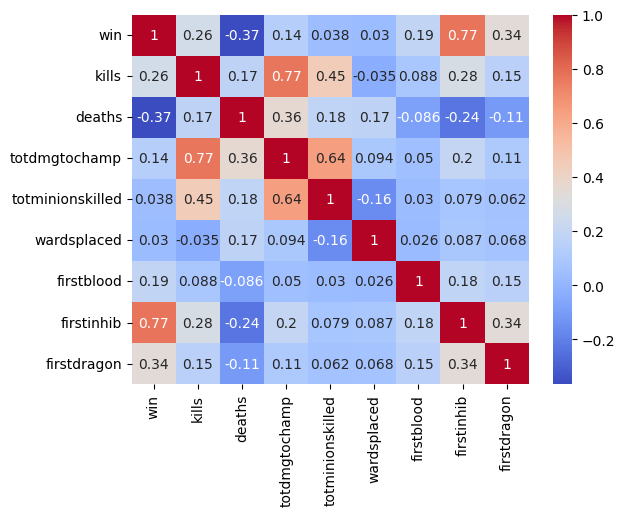

In [46]:
sns.heatmap(data = numericos.corr(), cmap = "coolwarm", annot = True)

<Axes: xlabel='totminionskilled', ylabel='Count'>

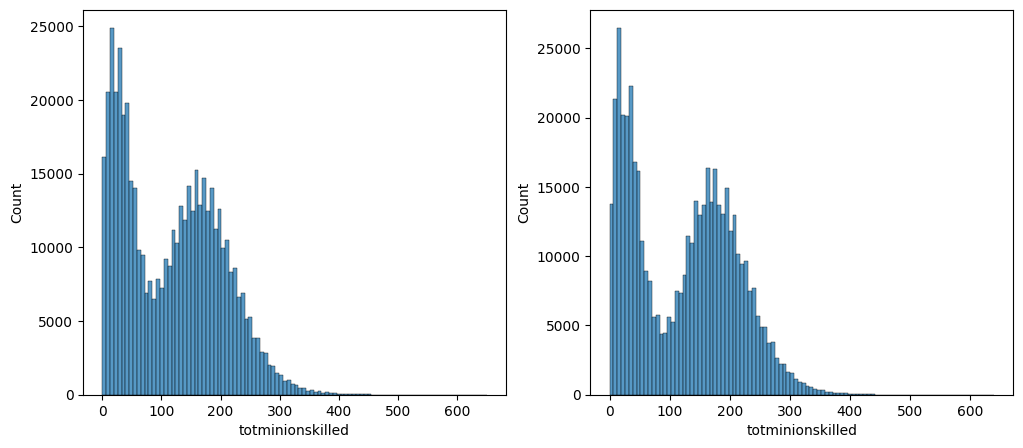

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data = todo[todo["win"] == 0], x = "totminionskilled", bins = 100, ax = ax1)
sns.histplot(data = todo[todo["win"] == 1], x = "totminionskilled", bins = 100, ax = ax2)

In [106]:
broken_pos = todo["position"].value_counts().sort_values(ascending = False)

In [107]:
broken_pos = pd.DataFrame({"position": broken_pos.index, "veces_jugado": broken_pos.values})

Text(0.5, 1.0, 'Cantidad de veces que se ha jugado cada rol')

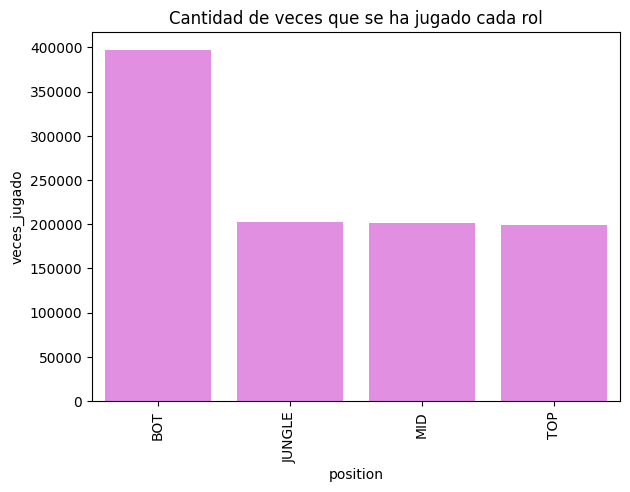

In [113]:
sns.barplot(data = broken_pos, x = "position", y = "veces_jugado", color = "violet")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Cantidad de veces que se ha jugado cada rol")

In [110]:
todo.groupby(["position", "win"]).size().reset_index(name = "count").sort_values(by = "count", ascending = False)

,position,win,count
1,BOT,1,199464
0,BOT,0,197982
4,MID,0,101912
3,JUNGLE,1,101147
2,JUNGLE,0,100941
7,TOP,1,99738
5,MID,1,99651
6,TOP,0,99162


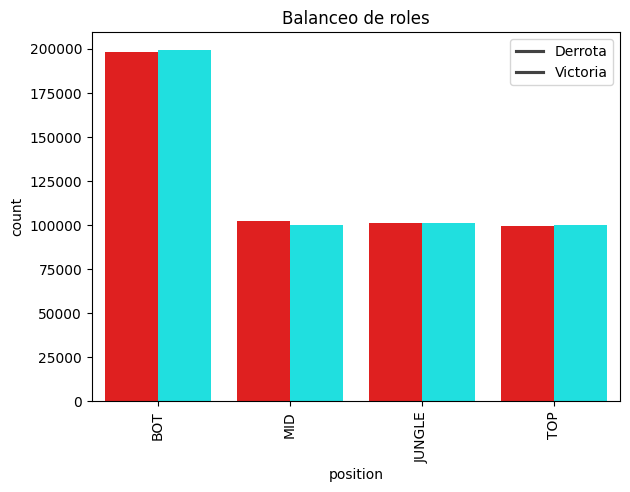

In [112]:
sns.barplot(data = todo.groupby(["position", "win"]).size().reset_index(name = "count").sort_values(by = "count", ascending = False), x = "position", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Balanceo de roles")
plt.legend(labels = ["Derrota", "Victoria"])

In [48]:
broken = todo["name"].value_counts().sort_values(ascending = False)

In [49]:
broken = pd.DataFrame({"name": broken.index, "veces_jugado": broken.values})

In [50]:
broken

,name,veces_jugado
0,Lee Sin,33768
1,Caitlyn,32717
2,Lucian,32435
3,Thresh,27597
4,Ahri,21032
...,...,...
131,Aurelion Sol,1160
132,Mordekaiser,1062
133,Corki,969
134,RekSai,913


Text(0.5, 1.0, 'Campeones ordenados por su uso')

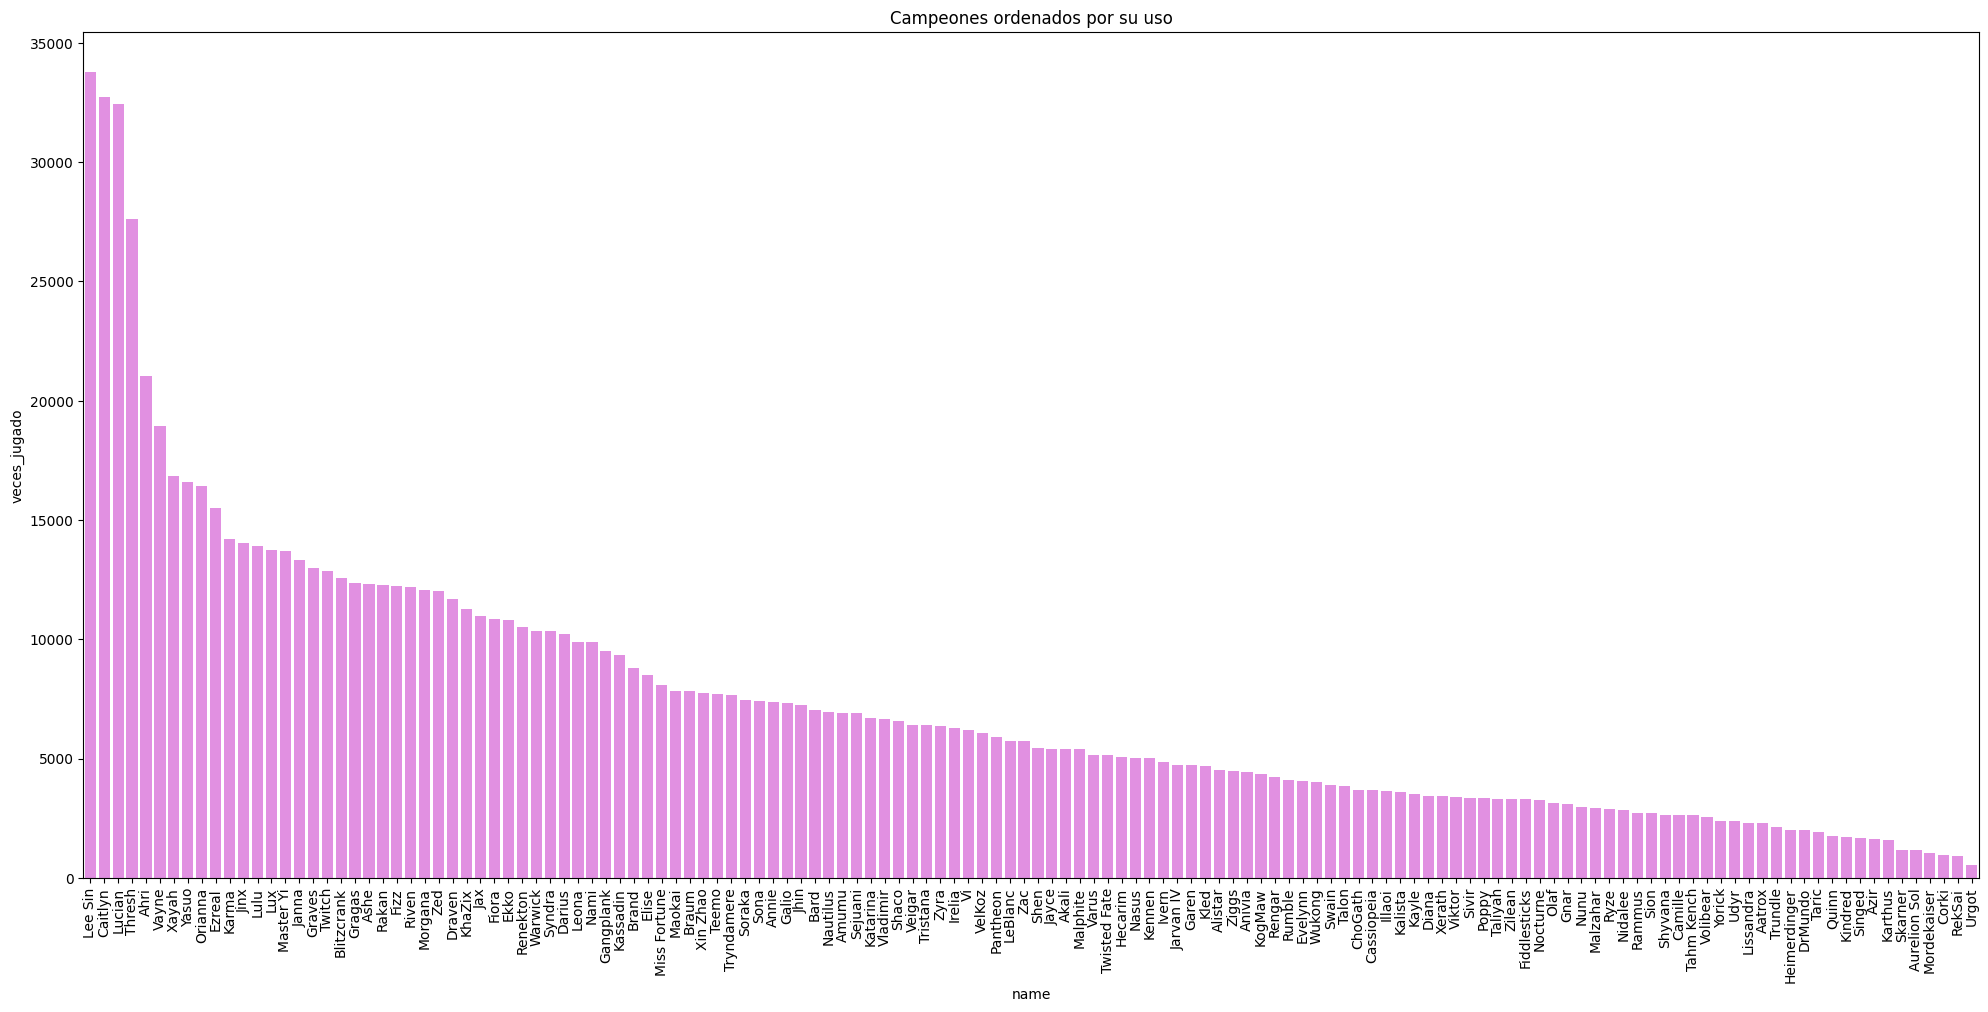

In [51]:
plt.figure(figsize = (20,10))
sns.barplot(data = broken, x = "name", y = "veces_jugado", color = "violet")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Campeones ordenados por su uso")

Text(0.5, 1.0, 'Los 10 campeones más usados')

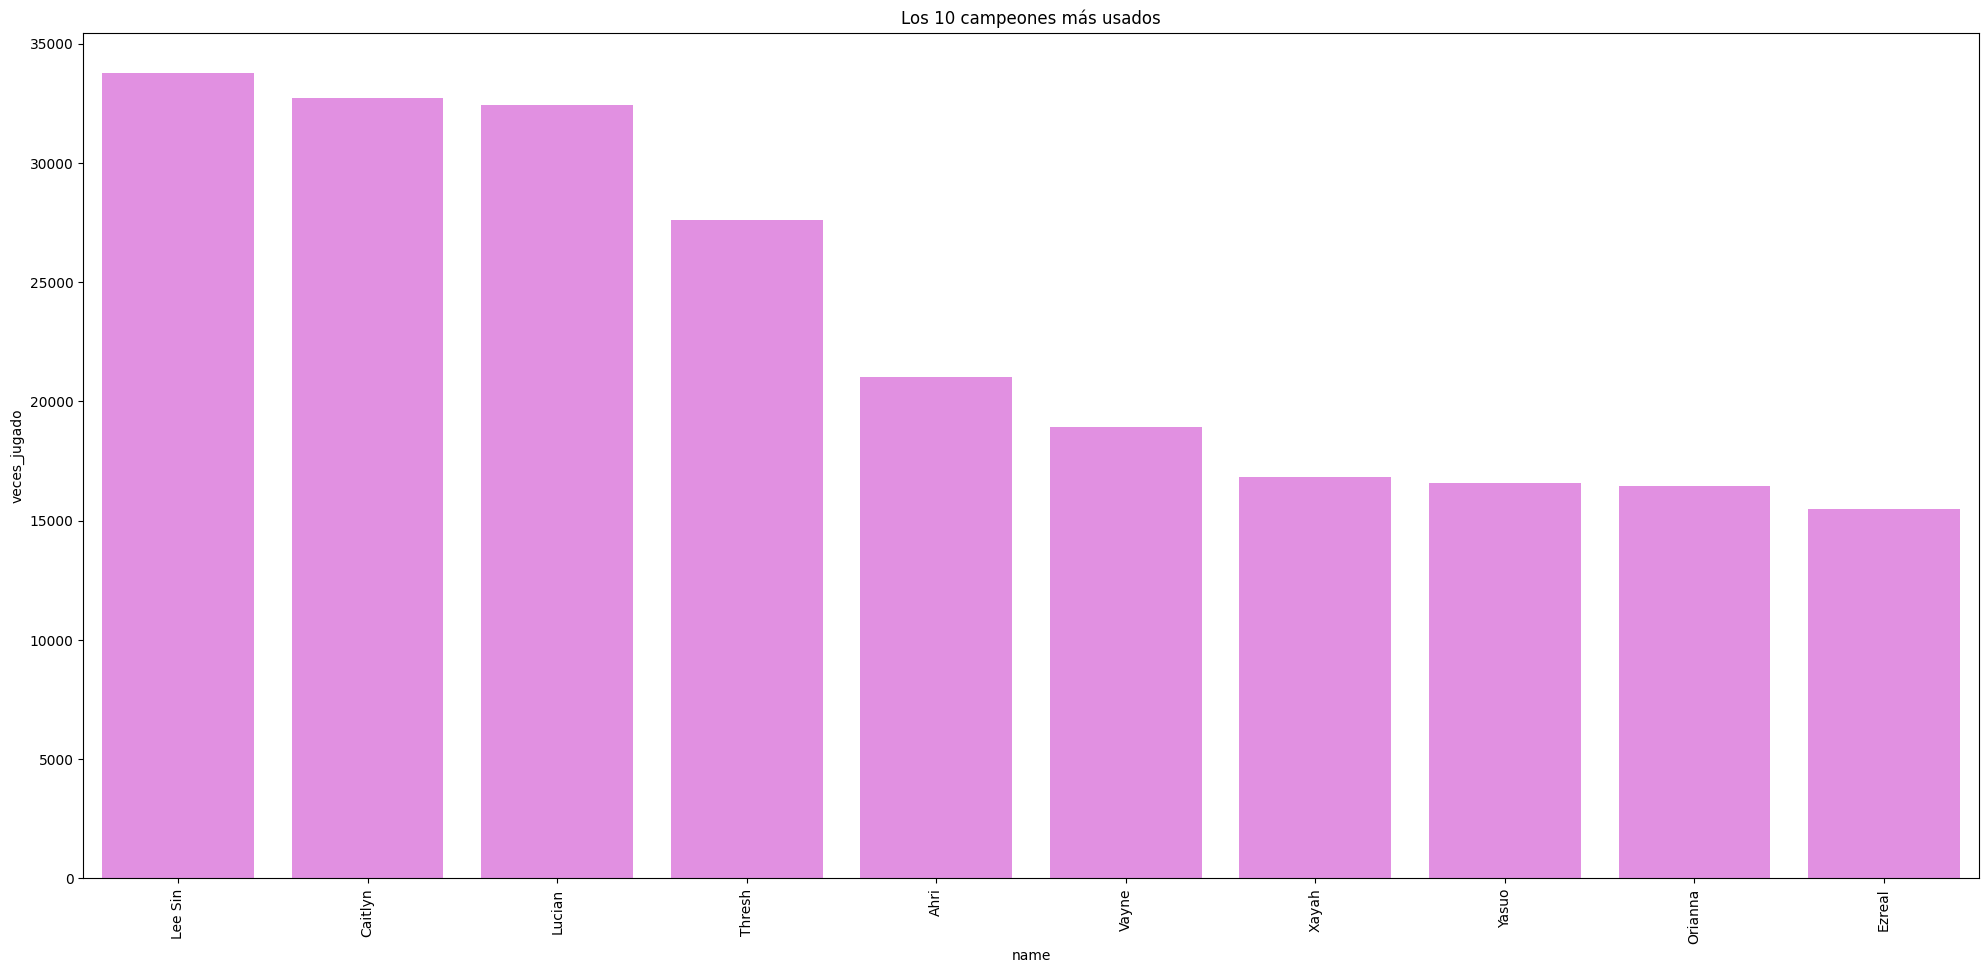

In [52]:
plt.figure(figsize = (20,10))
sns.barplot(data = broken, x = "name", y = "veces_jugado", color = "violet")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlim(right = 9.5)
plt.title("Los 10 campeones más usados")

In [53]:
todo.groupby(["name", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "name"], ascending = False)

,name,win,count
118,Lee Sin,0,17371
29,Caitlyn,1,16674
119,Lee Sin,1,16397
125,Lucian,1,16313
124,Lucian,0,16122
...,...,...,...
170,RekSai,0,463
171,RekSai,1,450
37,Corki,1,448
230,Urgot,0,290


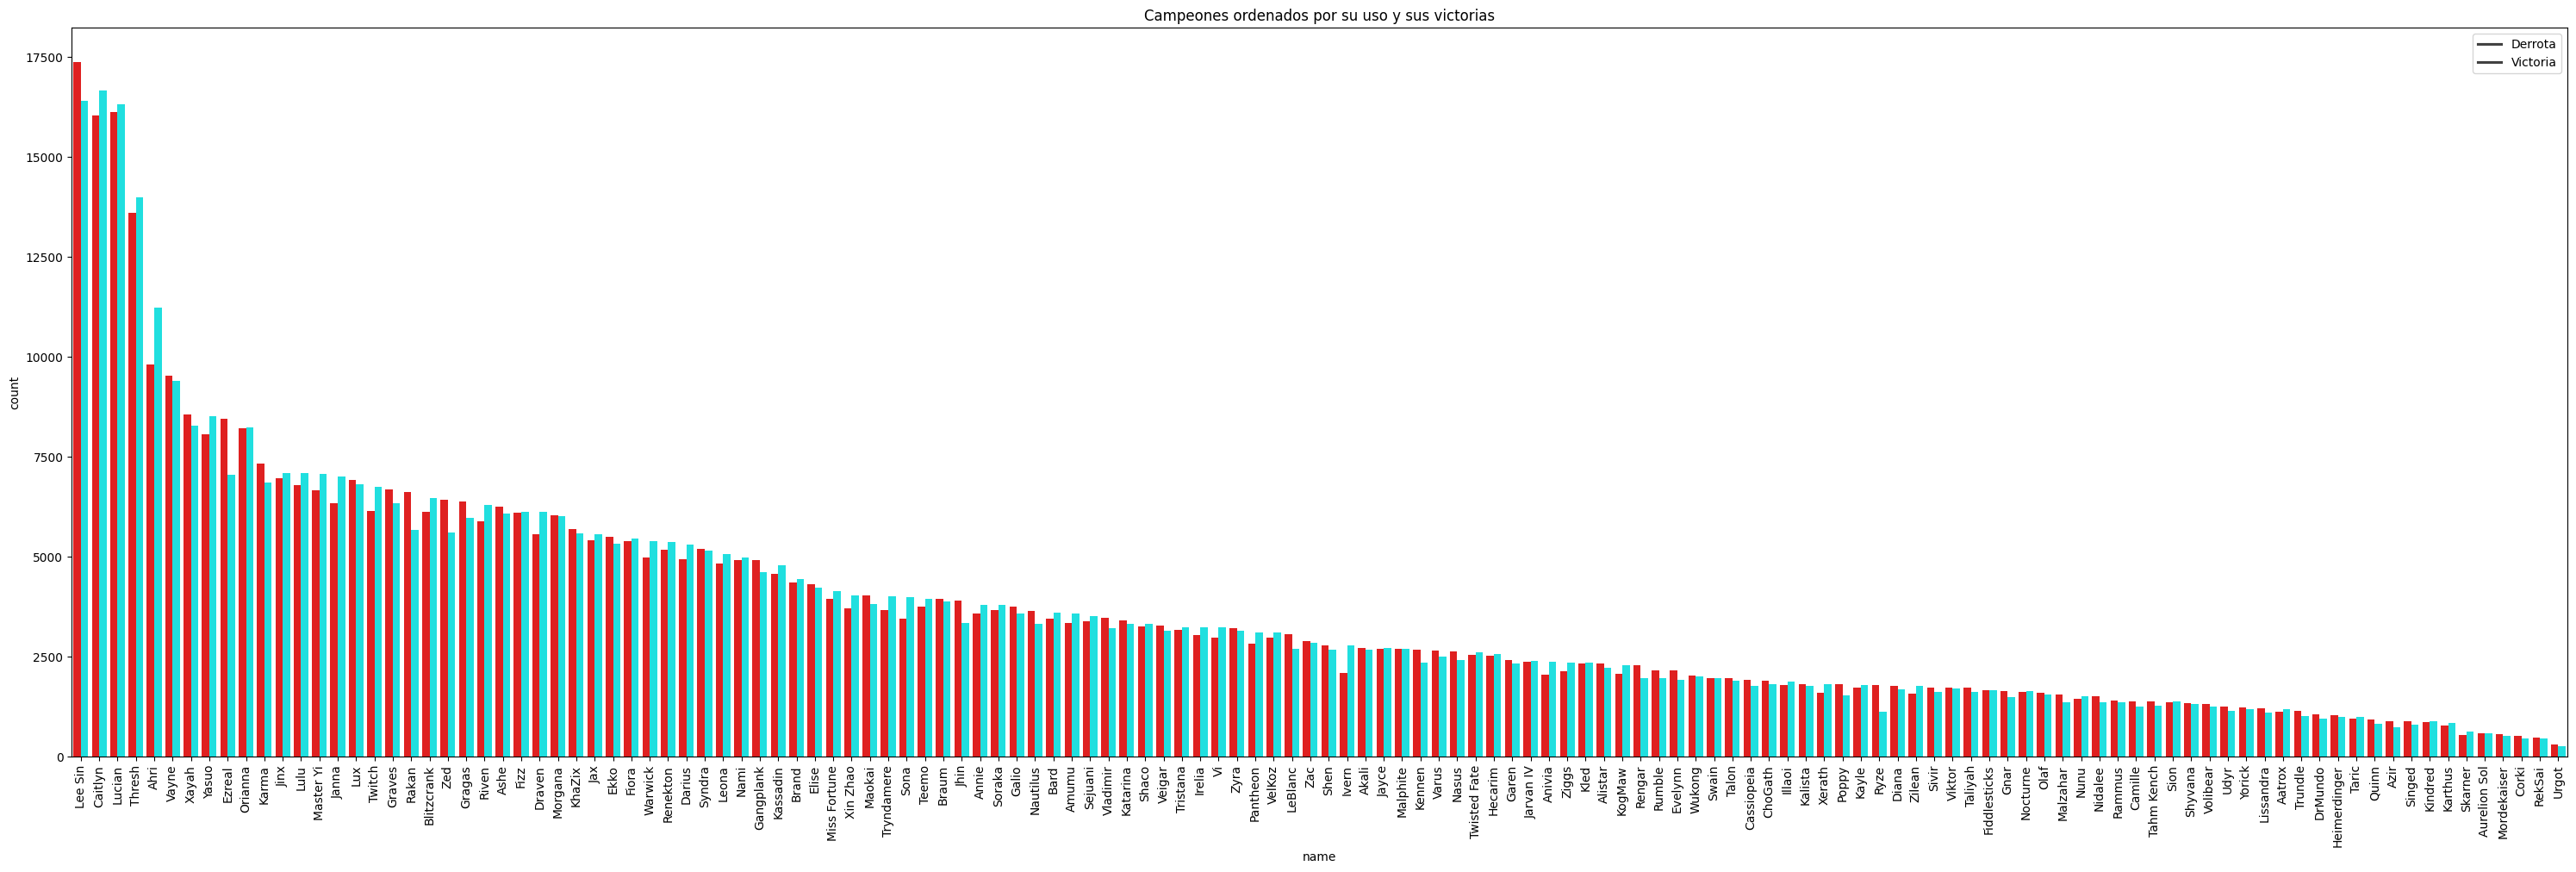

In [54]:
plt.figure(figsize = (30,10))
sns.barplot(data = todo.groupby(["name", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "name"], ascending = False), x = "name", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Campeones ordenados por su uso y sus victorias")
plt.legend(labels = ["Derrota", "Victoria"])

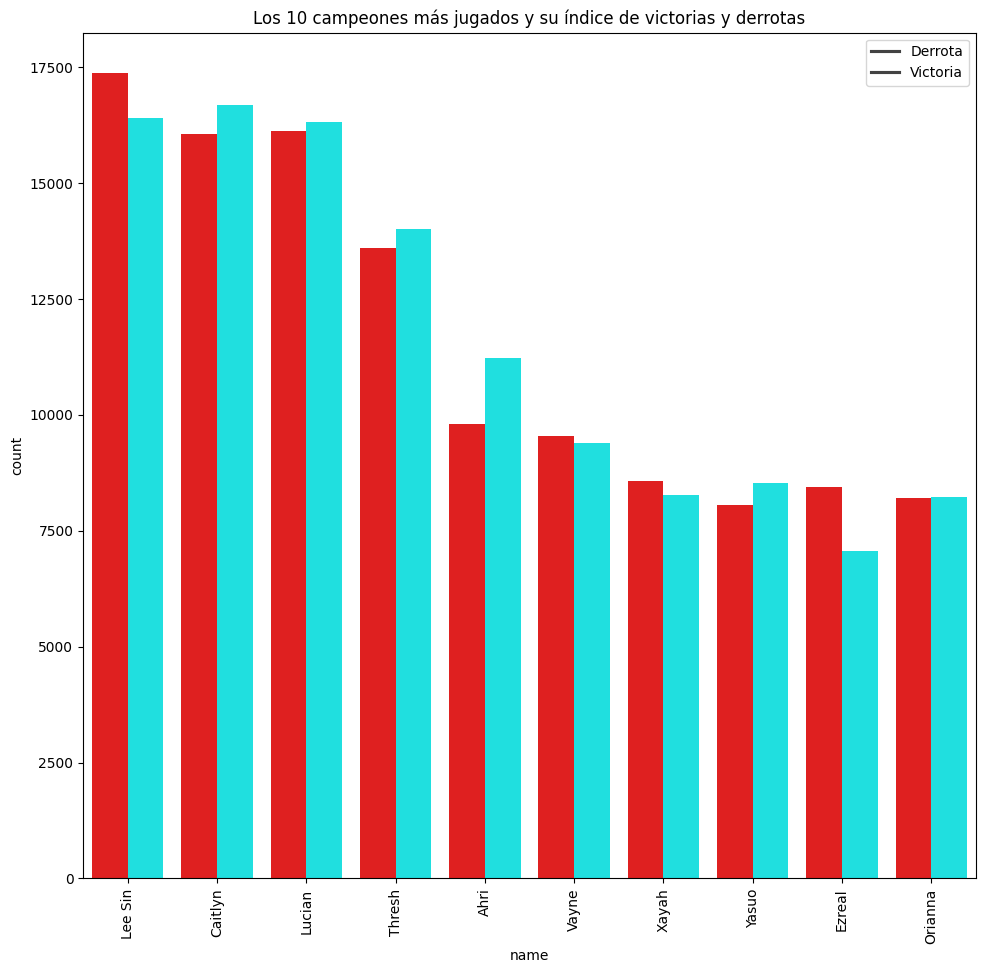

In [55]:
plt.figure(figsize = (10,10))
sns.barplot(data = todo.groupby(["name", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "name"], ascending = False), x = "name", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlim(right = 9.5)
plt.title("Los 10 campeones más jugados y su índice de victorias y derrotas")
plt.legend(labels = ["Derrota", "Victoria"])

In [56]:
broken_items = pd.concat([todo["item1"], todo["item2"], todo["item3"]], ignore_index = True)

In [57]:
broken_item = broken_items.value_counts().sort_values(ascending = False)

In [58]:
broken_item = pd.DataFrame({"item": broken_item.index, "veces_comprado": broken_item.values})

In [59]:
broken_item.drop(index = 0, inplace = True)

Text(0.5, 1.0, 'Campeones ordenados por su uso')

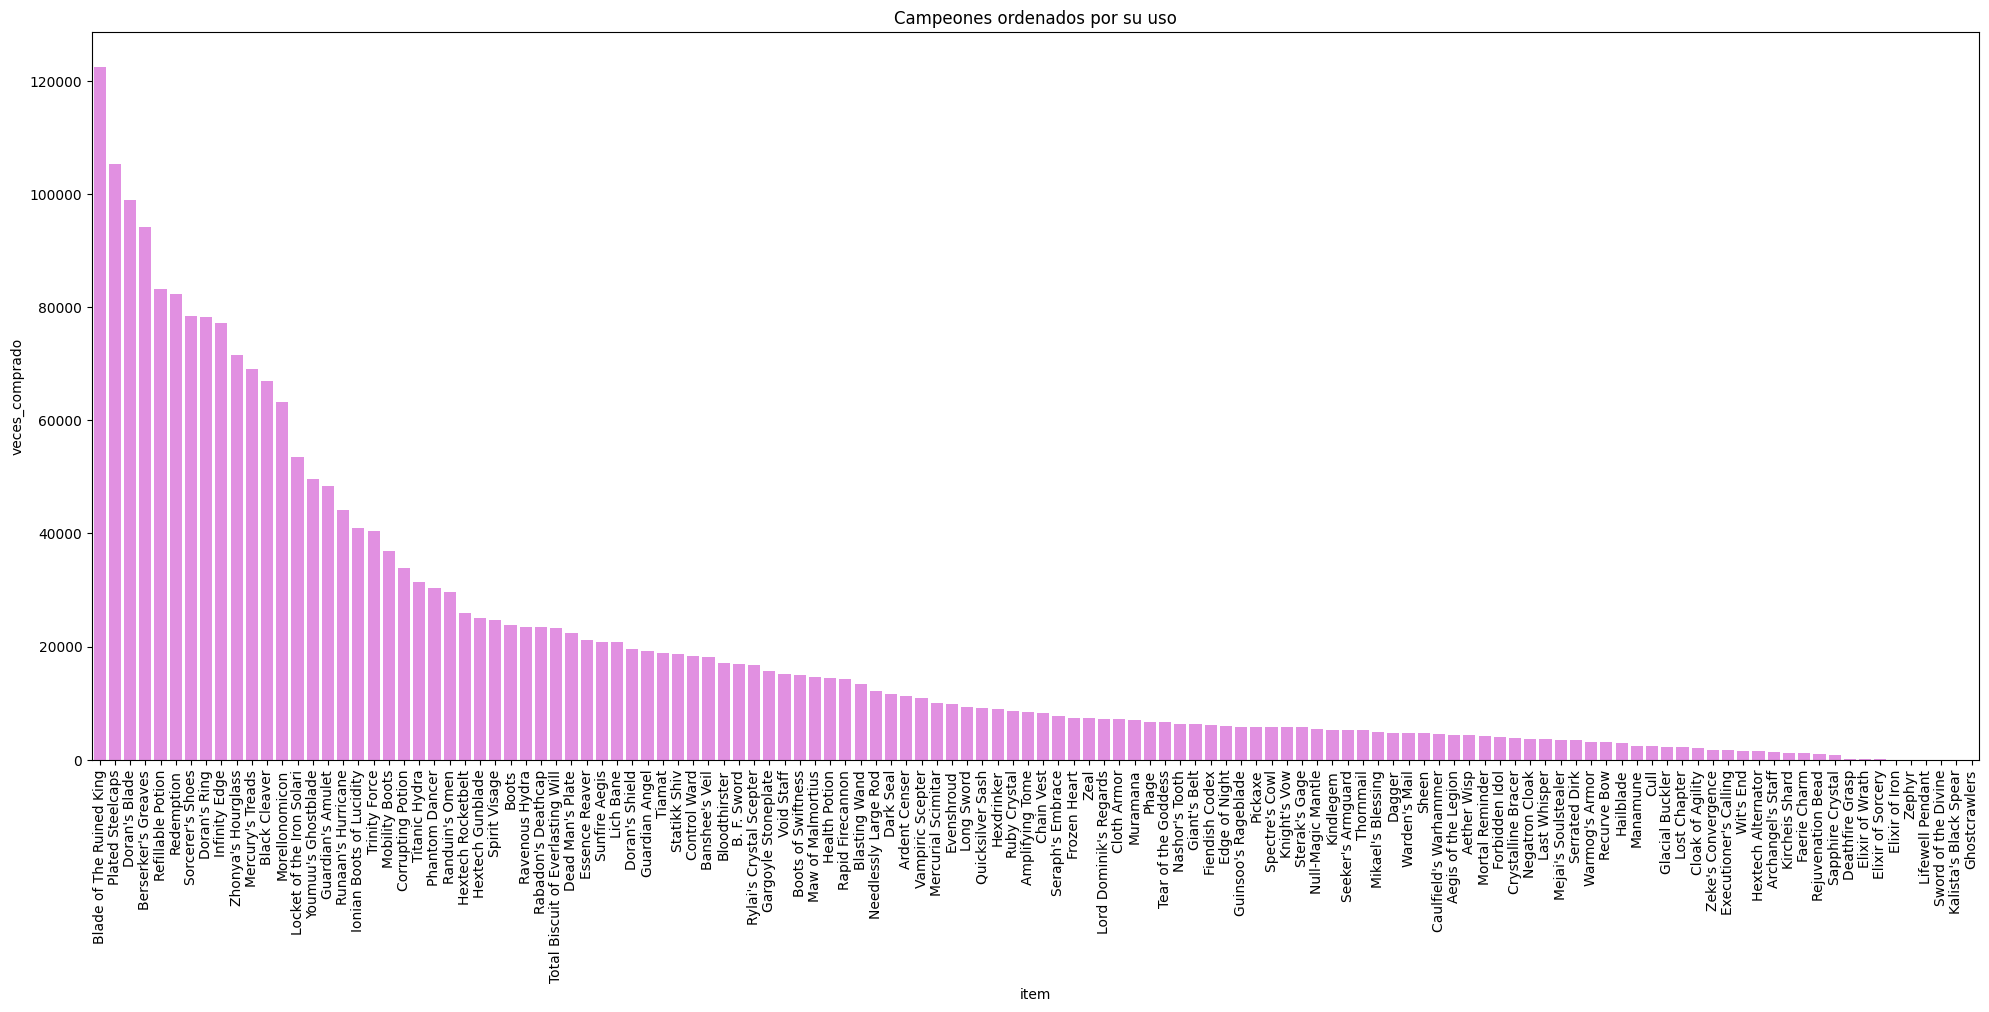

In [60]:
plt.figure(figsize = (20,10))
sns.barplot(data = broken_item, x = "item", y = "veces_comprado", color = "violet")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Campeones ordenados por su uso")

Text(0.5, 1.0, 'Los 10 objetos más comprados')

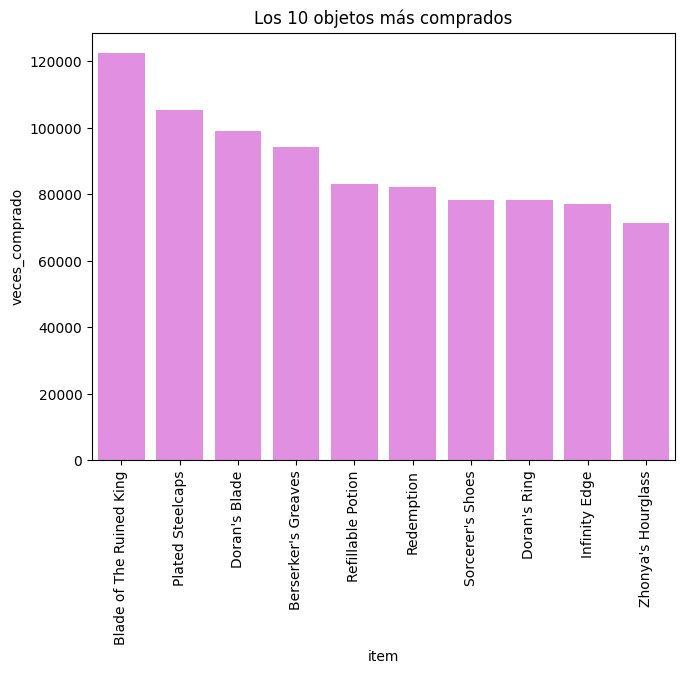

In [61]:
plt.figure(figsize = (7,7))
sns.barplot(data = broken_item, x = "item", y = "veces_comprado", color = "violet")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlim(right = 9.5)
plt.title("Los 10 objetos más comprados")

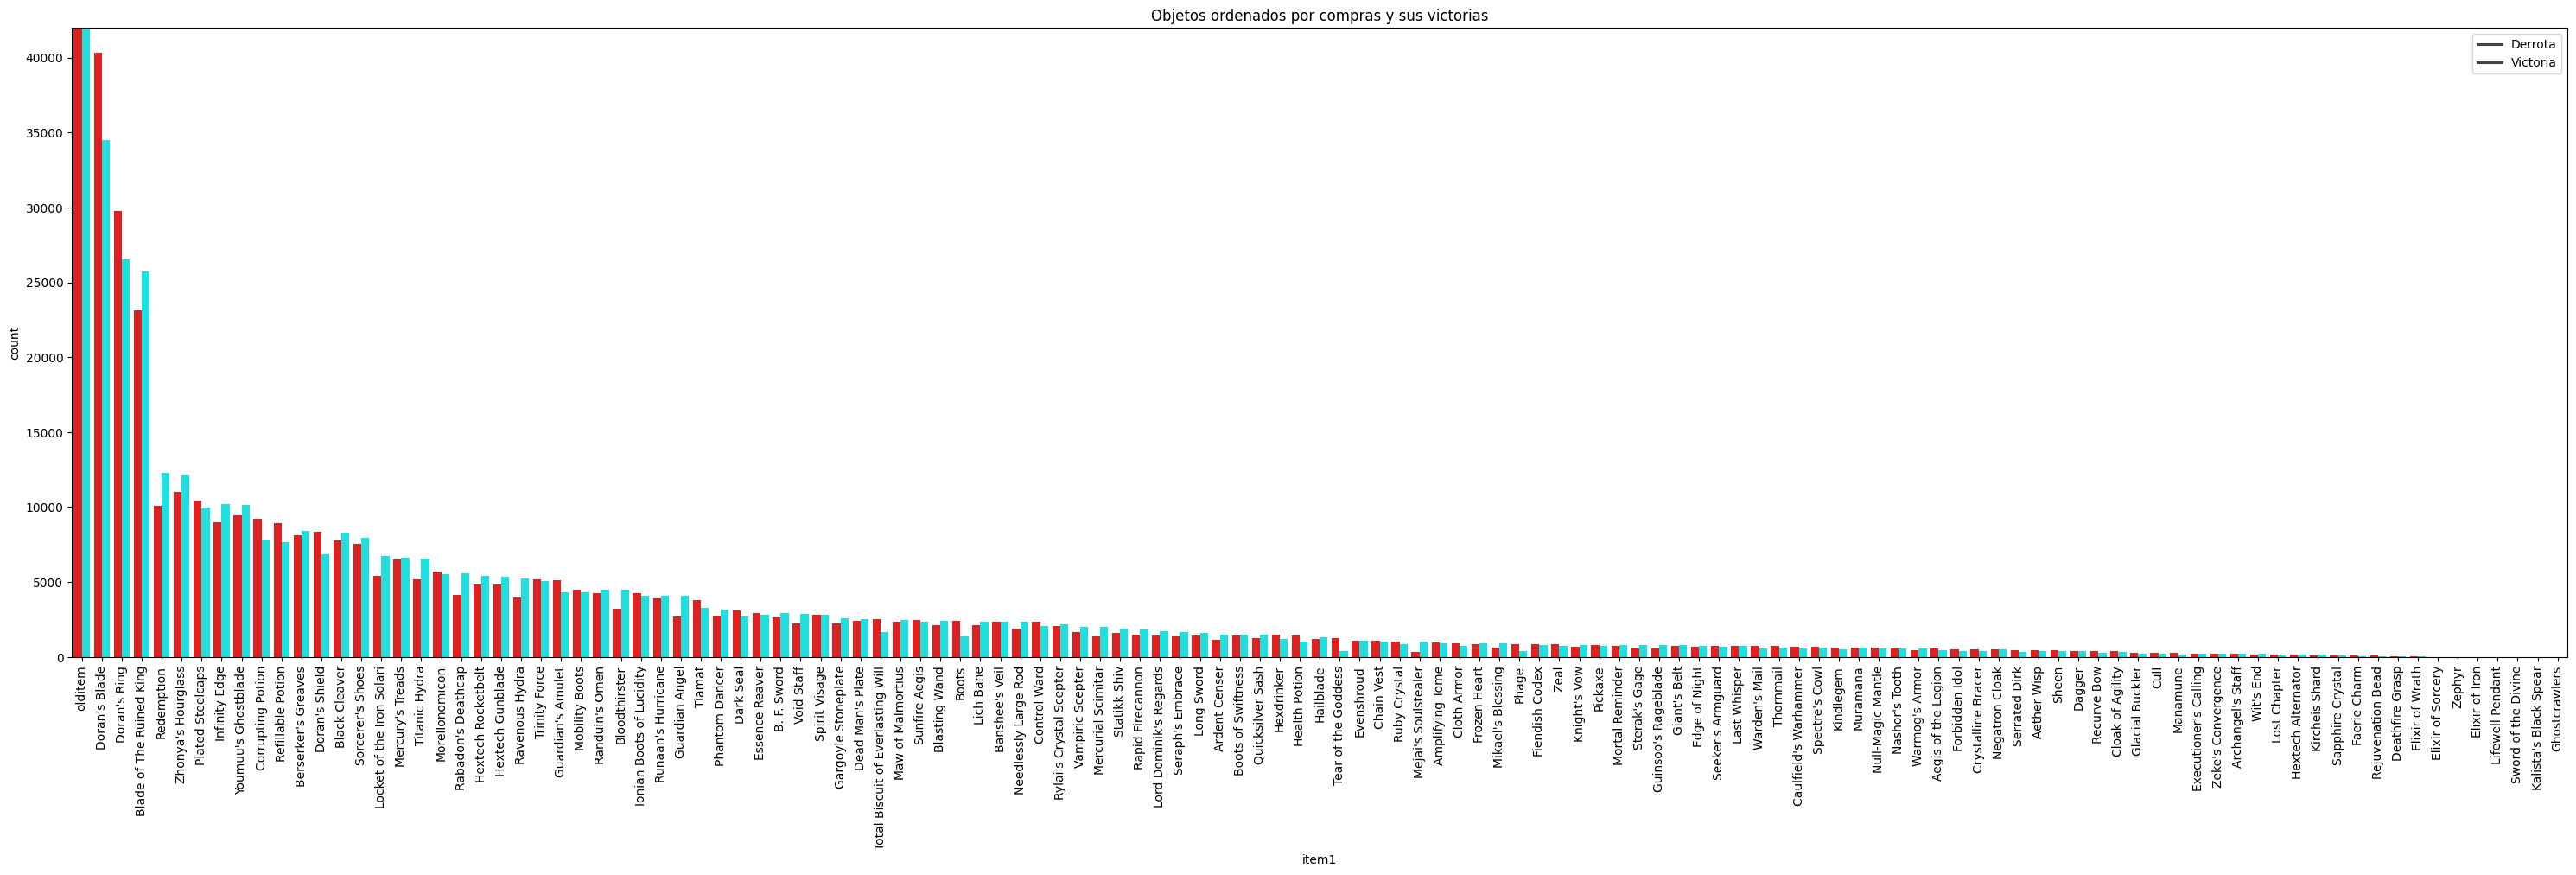

In [62]:
plt.figure(figsize = (30,10))
sns.barplot(data = todo.groupby(["item1", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "item1"], ascending = False), x = "item1", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Objetos ordenados por compras y sus victorias")
plt.ylim(top = 42000)
plt.legend(labels = ["Derrota", "Victoria"])

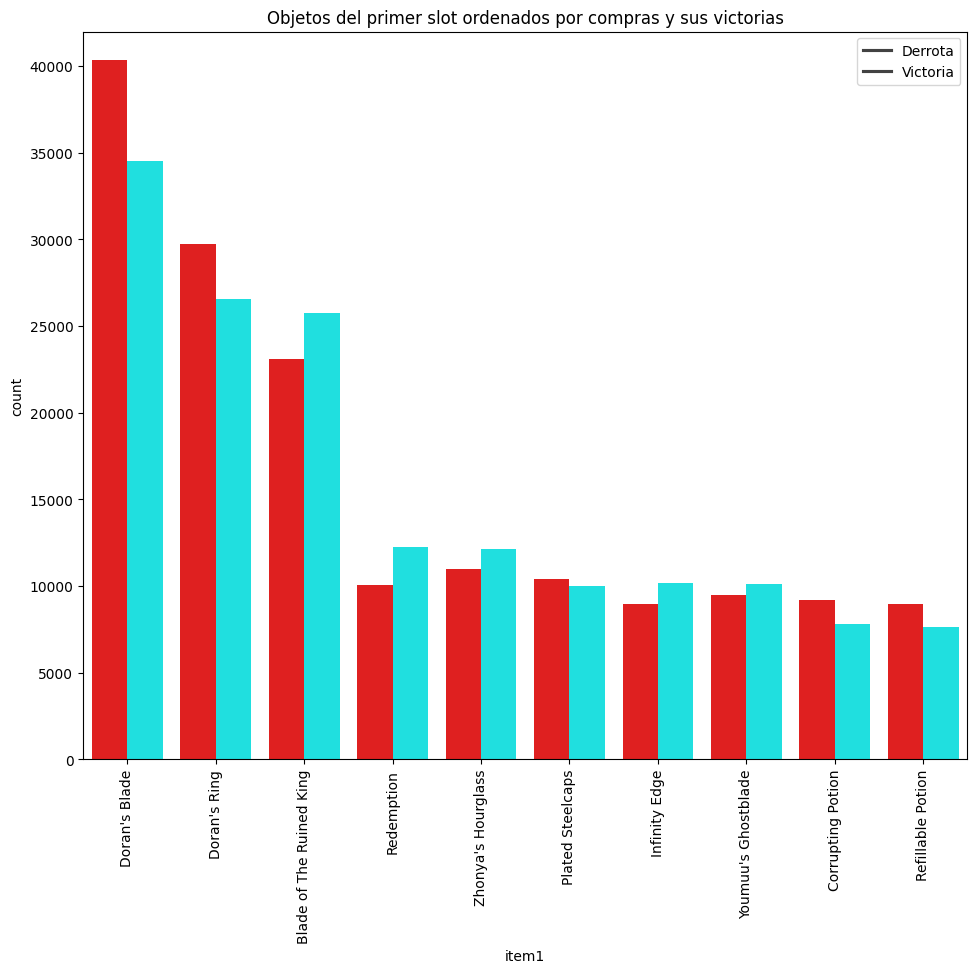

In [63]:
plt.figure(figsize = (10,10))
sns.barplot(data = todo.groupby(["item1", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "item1"], ascending = False), x = "item1", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Objetos del primer slot ordenados por compras y sus victorias")
plt.ylim(top = 42000)
plt.xlim(left = 0.5, right = 10.5)
plt.legend(labels = ["Derrota", "Victoria"])

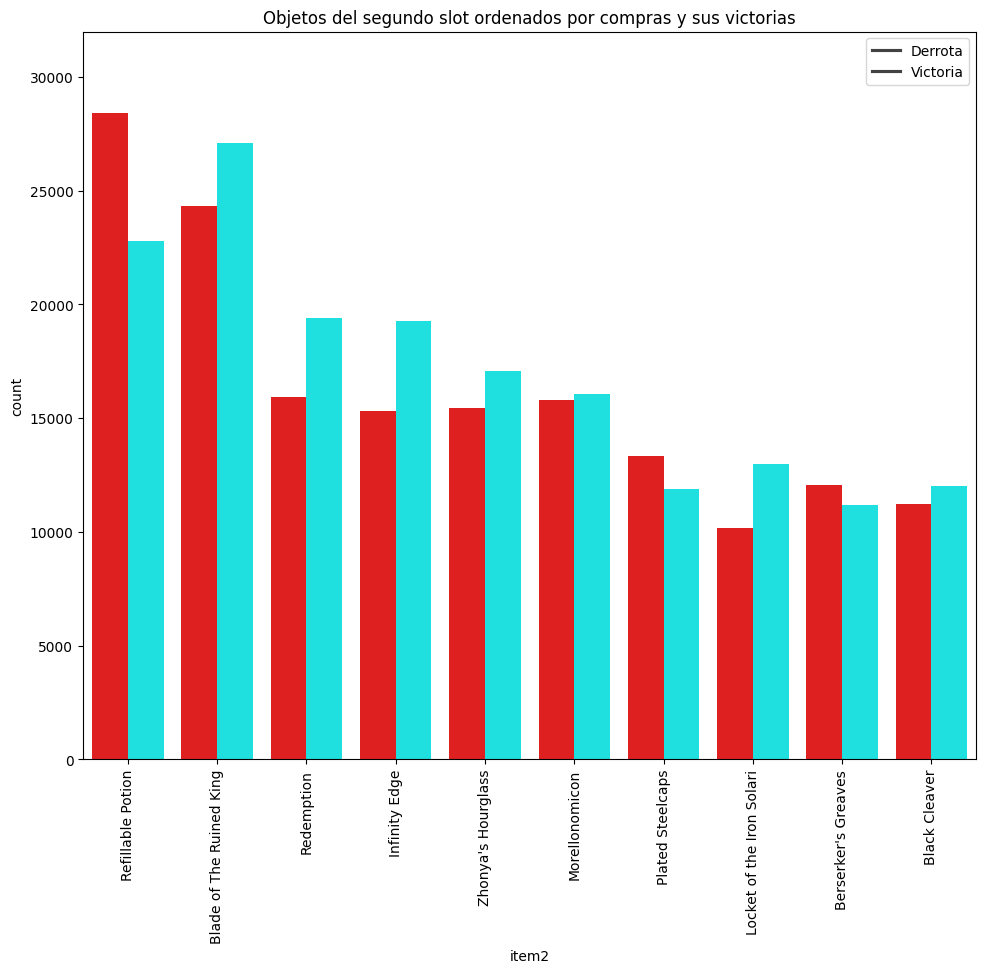

In [64]:
plt.figure(figsize = (10,10))
sns.barplot(data = todo.groupby(["item2", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "item2"], ascending = False), x = "item2", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Objetos del segundo slot ordenados por compras y sus victorias")
plt.ylim(top = 32000)
plt.xlim(left = 0.5, right = 10.5)
plt.legend(labels = ["Derrota", "Victoria"])

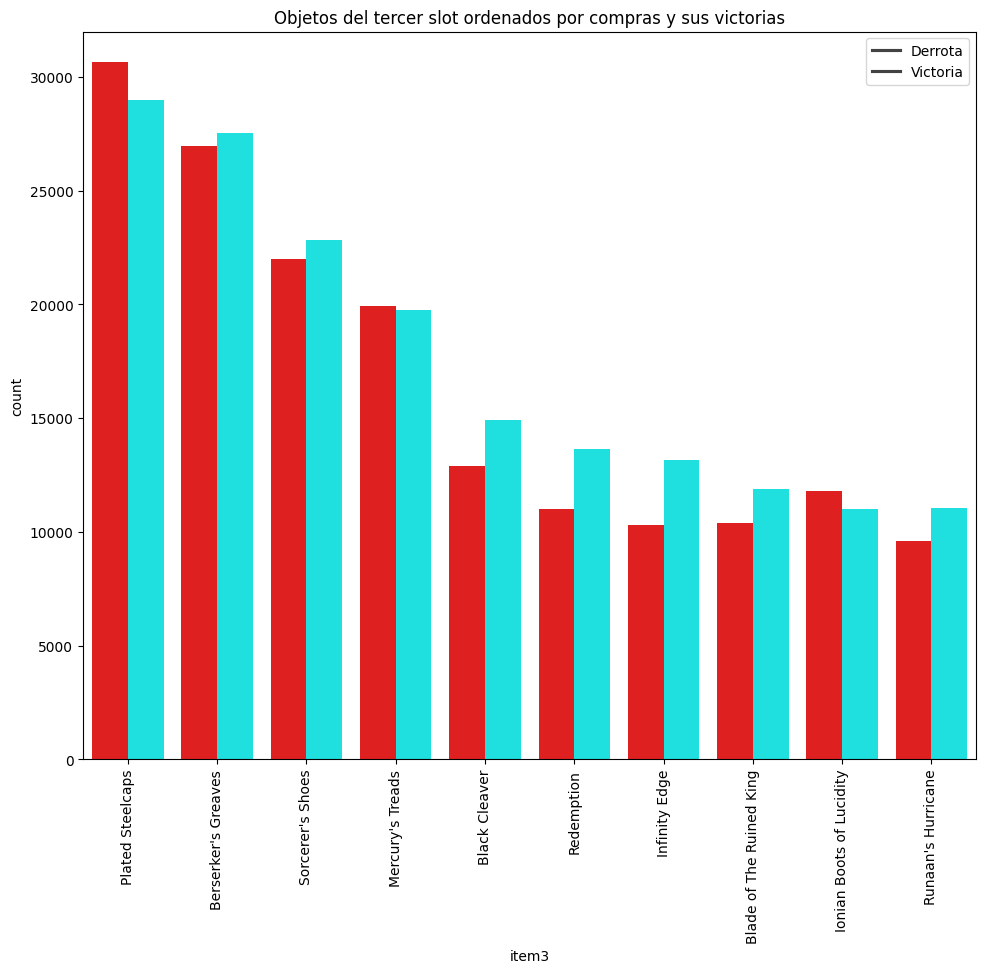

In [65]:
plt.figure(figsize = (10,10))
sns.barplot(data = todo.groupby(["item3", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "item3"], ascending = False), x = "item3", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Objetos del tercer slot ordenados por compras y sus victorias")
plt.ylim(top = 32000)
plt.xlim(left = 0.5, right = 10.5)
plt.legend(labels = ["Derrota", "Victoria"])

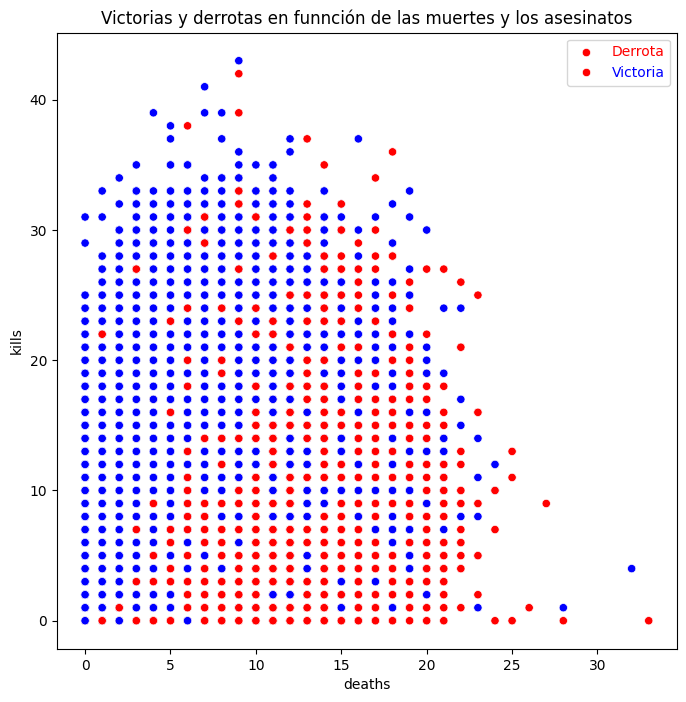

In [75]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data = todo, x = "deaths", y = "kills", hue = "win", palette = ["red", "blue"])
plt.title("Victorias y derrotas en funnción de las muertes y los asesinatos")
plt.legend(labels = ["Derrota", "Victoria"], labelcolor = ["red", "blue"])

In [88]:
todo[(todo['win'] == 1) & (todo["dragonkills"] < 5)]

,platformid,queueid,duration,matchid,player,position,win,kills,deaths,assists,...,item3,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,baronkills,dragonkills,teamid_winner
5,EUW1,420,1909,10,6,JUNGLE,1,3,3,9,...,Trinity Force,200,1,0,1,1,1,1,3,200
6,EUW1,420,1909,10,7,TOP,1,4,5,11,...,Sunfire Aegis,200,1,0,1,1,1,1,3,200
7,EUW1,420,1909,10,8,MID,1,13,4,8,...,Rabadon's Deathcap,200,1,0,1,1,1,1,3,200
8,EUW1,420,1909,10,9,BOT,1,15,3,9,...,Berserker's Greaves,200,1,0,1,1,1,1,3,200
9,EUW1,420,1909,10,10,BOT,1,4,5,19,...,olditem,200,1,0,1,1,1,1,3,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999987,EUW1,420,1249,103125,1,MID,1,2,4,10,...,Sorcerer's Shoes,100,1,1,0,0,1,0,2,100
999988,EUW1,420,1249,103125,2,JUNGLE,1,7,1,4,...,Youmuu's Ghostblade,100,1,1,0,0,1,0,2,100
999989,EUW1,420,1249,103125,3,BOT,1,4,2,13,...,olditem,100,1,1,0,0,1,0,2,100
999990,EUW1,420,1249,103125,4,TOP,1,6,4,0,...,Plated Steelcaps,100,1,1,0,0,1,0,2,100


In [89]:
victorias = todo[(todo['win'] == 1) & (todo["dragonkills"] < 5)].groupby('dragonkills').size()
derrotas = todo[(todo['win'] == 0) & (todo["dragonkills"] < 5)].groupby('dragonkills').size()

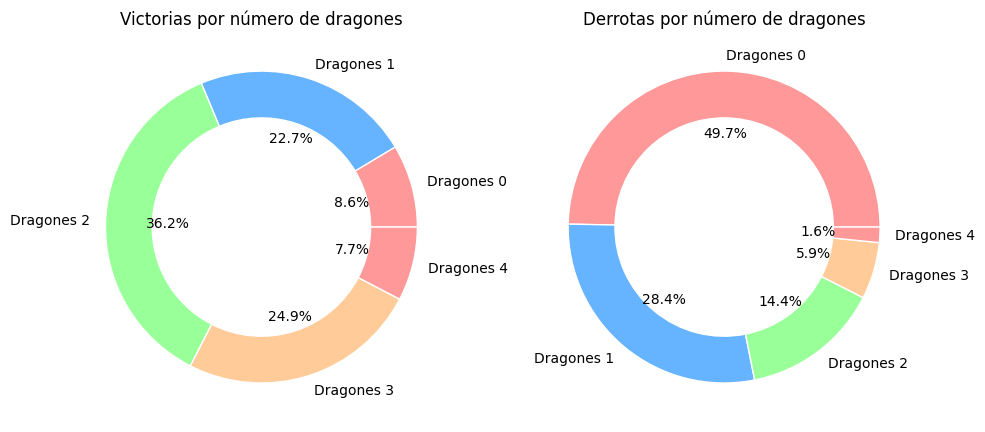

In [95]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.pie( victorias, labels=[f'Dragones {i}' for i in victorias.index], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], wedgeprops={'width': 0.3, 'edgecolor': 'white'})
plt.title('Victorias por número de dragones')

plt.subplot(1, 2, 2) 
plt.pie( derrotas, labels=[f'Dragones {i}' for i in derrotas.index], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], wedgeprops={'width': 0.3, 'edgecolor': 'white'})
plt.title('Derrotas por número de dragones')

plt.tight_layout() 
plt.show()

Text(0, 0.5, 'Niveles')

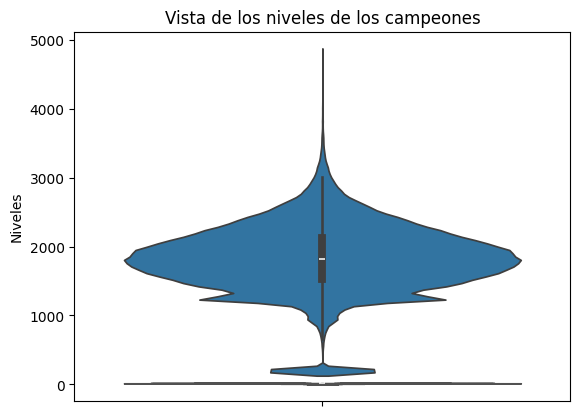

In [ ]:
sns.violinplot(data = todo, y = "duration")
plt.title("Vista de la duración de tiempo en las partidas")
plt.ylabel("Duración en segundos")


Text(0, 0.5, 'Niveles')

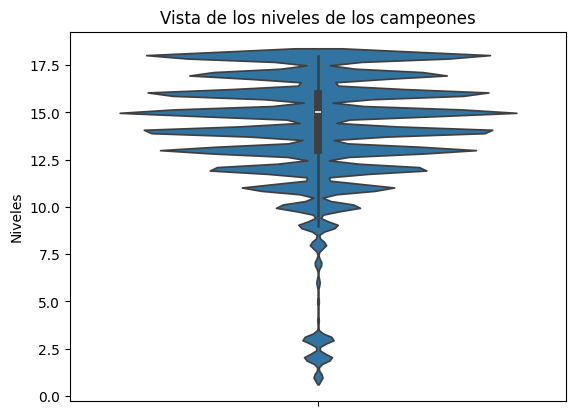

In [102]:
sns.violinplot(data = todo, y = "champlvl")
plt.title("Vista de los niveles de los campeones")
plt.ylabel("Niveles")

Text(0, 0.5, 'Asesinatos seguidos')

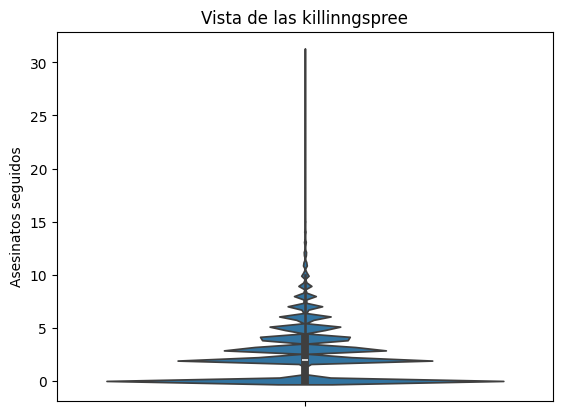

In [ ]:
sns.violinplot(data = todo, y = "largestkillingspree")
plt.title("Vista de las killinngspree")
plt.ylabel("Asesinatos seguidos")